In [6]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
from scipy.misc import derivative

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

## 미분

최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 하며 이러한 과정이 미분이다.

함수의 그래프상에 있는 한 점을 줌심으로 그래프를 무한히 확대해 보면 그래프의 모양이 직선에 가까워지는데 이때의 기울기를 미분이라고 한다. 이 직선은 같은 점을 기준으로 그린 그래프의 접선과 같다.

신경망에서 미분의 필요성 : https://gggggeun.tistory.com/120           https://gggggeun.tistory.com/121

미분 개념 : https://www.youtube.com/watch?v=kMZ3RJEaLE4


- 데이터 분석에서 미분은 왜 필요한가?
    - 미분으로 순간변화율을 알 수 있는데 이를 알면 어느 방향으로 가는지 알 수 있음. 이 기울기가 바로 가중치. 머신러닝과 딥러닝에서 가중치를 구해야 하기에 필요함


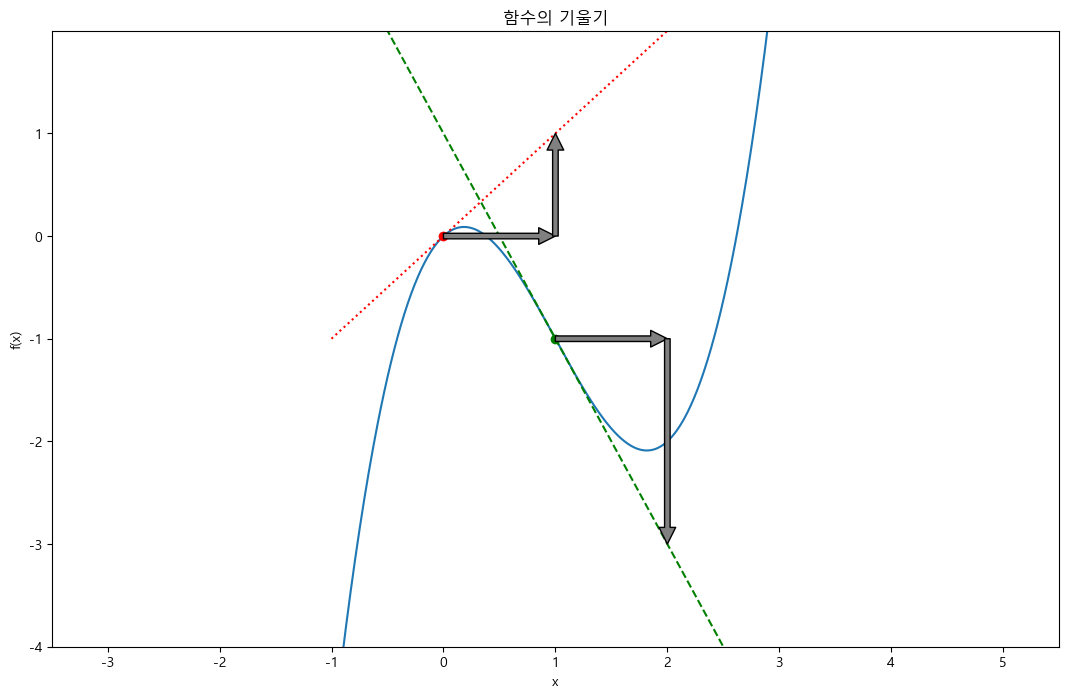

In [3]:
def f(x):
    return x**3 - 3 * x**2 + x     # 함수 정의. x값을 입력받아 f(x), 함수의 결과값을 반환

x = np.linspace(-1, 3, 400)         # -1 부터 3까지 400개의 동일한 간격으로 나눈 값들을 생성하고 함수의 결과값 y에 할당
y = f(x)

plt.figure(figsize=(13,8))
plt.plot(x, y)
plt.plot(0, 0, 'ro')                #  (0, 0) 좌표에 빨간색(red) 원형(o) 마커를 그리는 코드
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--') 
#  x 좌표를 x, y 좌표를 (3*1**2-6*1+1)*(x-1)-1으로 하는 점들을 그래프 상에 초록색(green) 점선(--, dashed)으로 그리는 코드

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))    # x축의 눈금
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

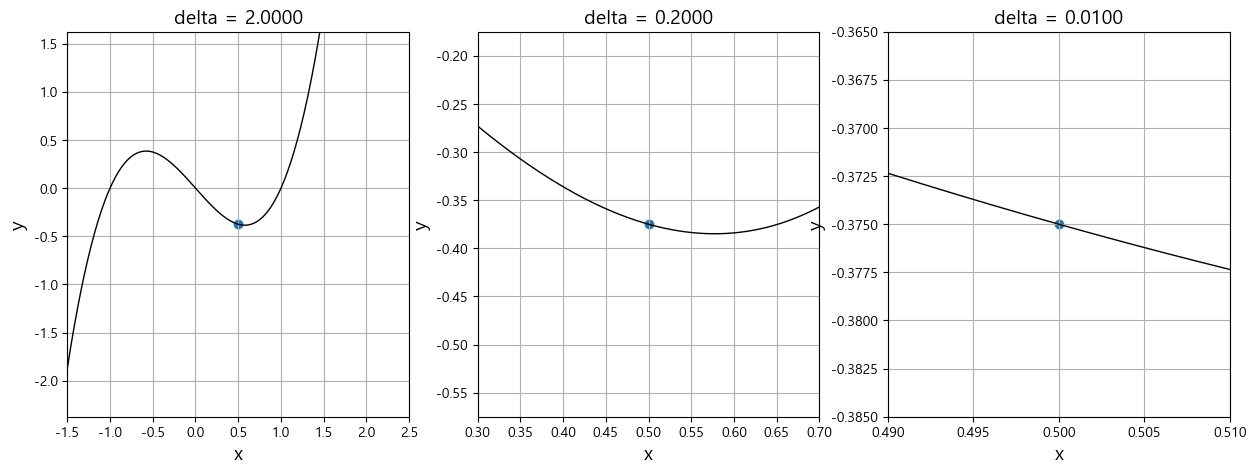

In [10]:
def f(x):
    return(x**3 - x)

plt.figure(figsize=(15, 5))
delta = [2.0, 0.2, 0.01]

x = np.linspace(0.5-delta[0], 0.5+delta[0], 200)
y = f(x)

plt.subplot(131)

plt.ylim(-3.0/8.0-delta[0], -3.0/8.0+delta[0])
plt.xlim(0.5-delta[0], 0.5+delta[0])
plt.plot(x, y, 'b-', lw=1, c='k')                 # 'b-'는 파란색 선을 의미하며, lw=1, c='k'는 선의 굵기를 1로, 색을 검정색
plt.scatter([0.5], [-3.0/8.0])                    # x값이 0.5, y값이 -3.0/8.0인 점을 그리는 코드
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()                                         # 그래프에 격자를 그리는 코드
plt.title('delta = %.4f' % delta[0], fontsize=14)


x = np.linspace(0.5-delta[1], 0.5+delta[1], 200)
y = f(x)

plt.subplot(132)

plt.ylim(-3.0/8.0-delta[1], -3.0/8.0+delta[1])
plt.xlim(0.5-delta[1], 0.5+delta[1])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[1], fontsize=14)

x = np.linspace(0.5-delta[2], 0.5+delta[2], 200)
y = f(x)

plt.subplot(133)

plt.ylim(-3.0/8.0-delta[2], -3.0/8.0+delta[2])
plt.xlim(0.5-delta[2], 0.5+delta[2])
plt.plot(x, y, 'b-', lw=1, c='k')
plt.scatter([0.5], [-3.0/8.0])
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.grid()
plt.title('delta = %.4f' % delta[2], fontsize=14)

plt.show()

### 접선의 방정식

- 함수 f(x)에서 x의 값을 dx만큼 변화시켰을 때 f(x)의 변화량 (f(x+dx)-f(x))는 f'(x)dx와 같다.
- 미분 : y=f(x)라는 그래프상의 점(a,f(a))가 있을 때 그 점에서 그은 접선의 기울기는 f'(a)이며 a에서의 순간 변화율을 의미
- 적분 : 도함수 f'(x)의 하방 면적은 원 함수 f(x)의 y의 값이다. ex) f(x) = $x^2$

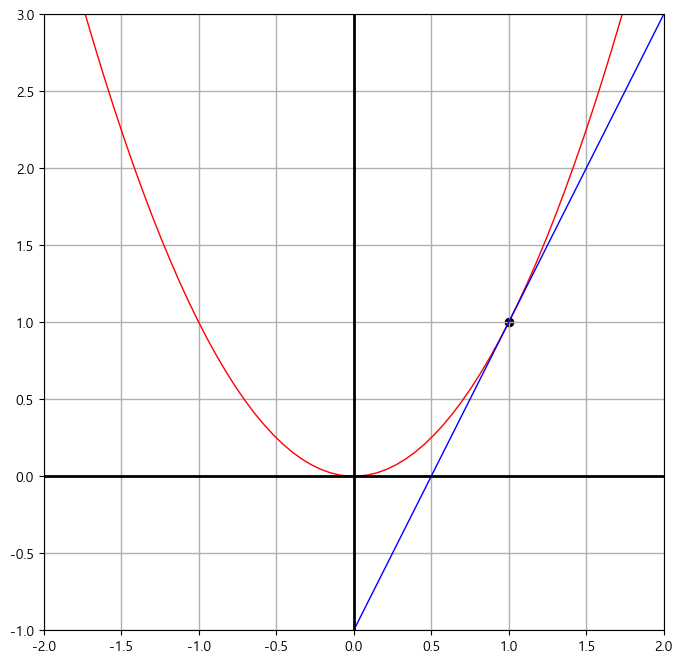

In [5]:
def f(x):
    return (x**2)
def g(x):
    return (2*x -1)

x = np.linspace(-3,3,100)
fig = plt.figure(figsize=(8,8))
plt.scatter([1],[1], c='k')   # 접점에 점 찍기

plt.plot(x, f(x), 'r-', lw=1)    # f(x) = 𝑥2
plt.plot(x, g(x), 'b-', lw=1)    # y = 2x-1

plt.plot([x.min(), x.max()], [0,0], lw=2, c='k')    # x축
plt.plot([0,0], [g(x).min(), f(x).max()], lw=2, c='k')    # y축

plt.xlim(-2,2)
plt.ylim(-1,3)
plt.grid(lw=1)
plt.show()

In [6]:
from scipy.misc import derivative   #도함수: 함수의 변화율을 나타내는 함수
print(derivative(f, 1, dx=1e-6))   #계산할 함수, x값, 정확도 보정(기본값: 1e-6/ 작을수록 정확)
print(derivative(f, 2, dx=1e-6))

2.000000000002
4.000000000115023


#### 편미분
- 다변수 함수에서 한 변수를 제외한 나머지 변수들의 값을 고정하고, 해당 변수의 변화에 따른 함수값의 변화량을 나타내는 개념

In [4]:
import sympy
sympy.init_printing(use_latex='mathjax')
# 주피터 노트북에서 수학식의 LaTeX 표현을 위해 필요함

x,y = sympy.symbols('x y')
x

x

In [3]:
f = (x**2) + (4*x*y) + (4*y**2)   
f        # 변수를 수학에서 사용하는 기호들로 써줌

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [9]:
# diff() 함수로 미분, 변수, 상수를 구분하기 위하여 편미분인 것처럼 입력변수 지정
print(sympy.diff(f, x))    # x를 기준으로 편미분
sympy.diff(f, y)    # y를 기준으로 편미분

2*x + 4*y


4⋅x + 8⋅y

## 적분
- 적분은 미분과 반대되는 개념. 부정적분과 정적분이 있다.
 - 부정적분은 정확하게 미분과 반대되는 개념. 즉 반 미분이다. 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정 또는 그 결과를 의미
 - 정적분은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x축)이 이루는 면적을 구하는 행위 혹은 그 값을 의미
 
적분의 개념 : https://www.youtube.com/watch?v=kV2j3S5qBm4

미분과 적분의 관계 : https://www.youtube.com/watch?v=xAAAvj7bmKQ

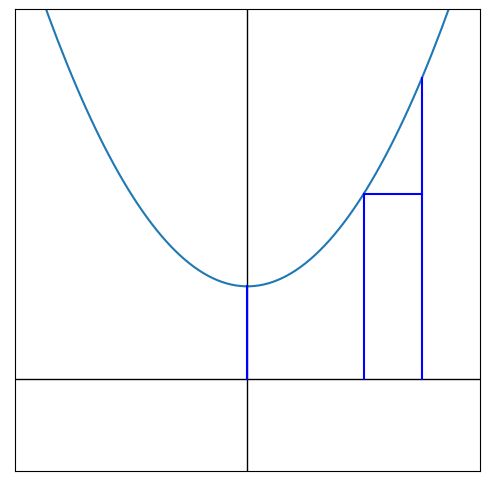

In [7]:
def f(x) :
    return x**2 + 1
xx = np.linspace(-4.0, 4.0, 200)
yy = f(xx)

plt.figure(figsize=(6,6))
plt.xlim(-2,2)
plt.ylim(-1,4)
plt.plot(xx, yy)
plt.plot([-2,2],[0,0],c='k',lw=1)
plt.plot([0,0],[-1,4],c='k',lw=1)
plt.plot([0,0],[0,f(0)],c='b')
plt.plot([1,1],[0,f(1)],c='b')
plt.plot([1.5,1.5],[0,f(1.5)],c='b')
plt.plot([1,1.5],[f(1),f(1)],c='b')
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

In [10]:
import sympy as sp
x, y = sp.symbols('x y')
f = 2 * x + y
f

2⋅x + y

In [11]:
# 위 식의 부정적분을 구하는 방법

sp.integrate(f,x)

 2      
x  + x⋅y

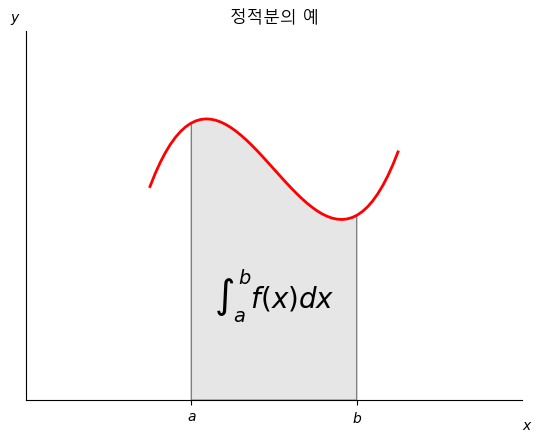

In [12]:
from matplotlib.patches import Polygon


def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("정적분의 예")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
plt.show()

In [14]:
# 부정적분

F = sp.integrate(f)
F

 4         2      
x     3   x       
── - x  + ── + 6⋅x
4         2       

In [15]:
#  F를 미분
x,y = sp.symbols('x y')
f = x**3 - 3*x**2 + x + 6
f

 3      2        
x  - 3⋅x  + x + 6

In [17]:
# 정적분 : 구간을 주기 때문에 저 면적을 구해줌
# 심볼릭 적분 - 정확한 적분값
sp.integrate(f,(x,0,2))          # f함수에서 x를 기준으로 0~2사이의 면적

10

In [20]:
# 수치적분 - 근사적인 적분값
import scipy as sp
def f(x):
    return x**3 - 3*x**2 + x + 6

sp.integrate.quad(f,0,2)    #  정적분(수치적분), 결과값의 두번째는 오차의 상한값

(10.0, 1.1102230246251565e-13)